In [125]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools
import warnings
warnings.filterwarnings("ignore")

#### MEMORY REDUCING FUNCTION

In [126]:
# Source : Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

##### DATA SOURCE

In [423]:
#Its based on the data collected by Kaggle and made available through the [PUBG Developer API](https://developer.pubg.com/).
data=pd.read_csv('C:/Users/mugesh/Projects/Pubg/Pubg_Data.csv')
data = reduce_mem_usage(data)

Memory usage of dataframe is 983.90 MB --> 339.28 MB (Decreased by 65.5%)


In [128]:
data.shape

(4446966, 29)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int16  
 27  winPoints   

In [130]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.800003,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.000000,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.800003,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.699997,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.750000,2,0,0.1875


#### EXPLORING THE DATA

In [131]:
for i in ['Id','groupId','matchId']:
    print(f'Number of [{i}]    :', data[i].nunique())

Number of [Id]    : 4446966
Number of [groupId]    : 2026745
Number of [matchId]    : 47965


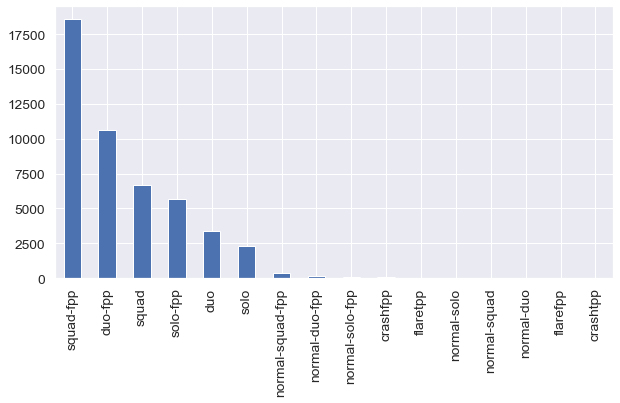

In [132]:
plt.figure(figsize=(10,5))
data.groupby('matchId')['matchType'].first().value_counts().plot.bar()

Types of Matches played 

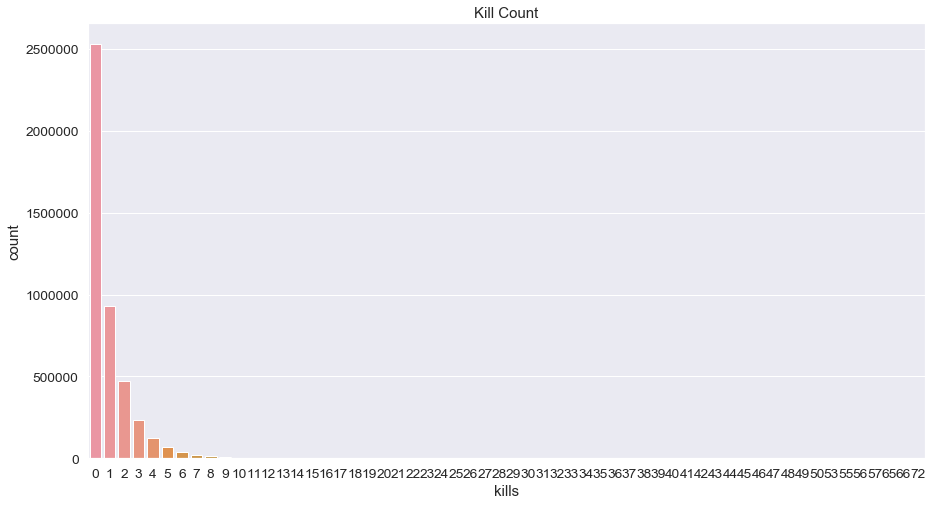

In [133]:
plt.figure(figsize=(15,8))
sns.countplot(data['kills'])
plt.title("Kill Count")
plt.show()

Mostly lot of players have Zero kills 

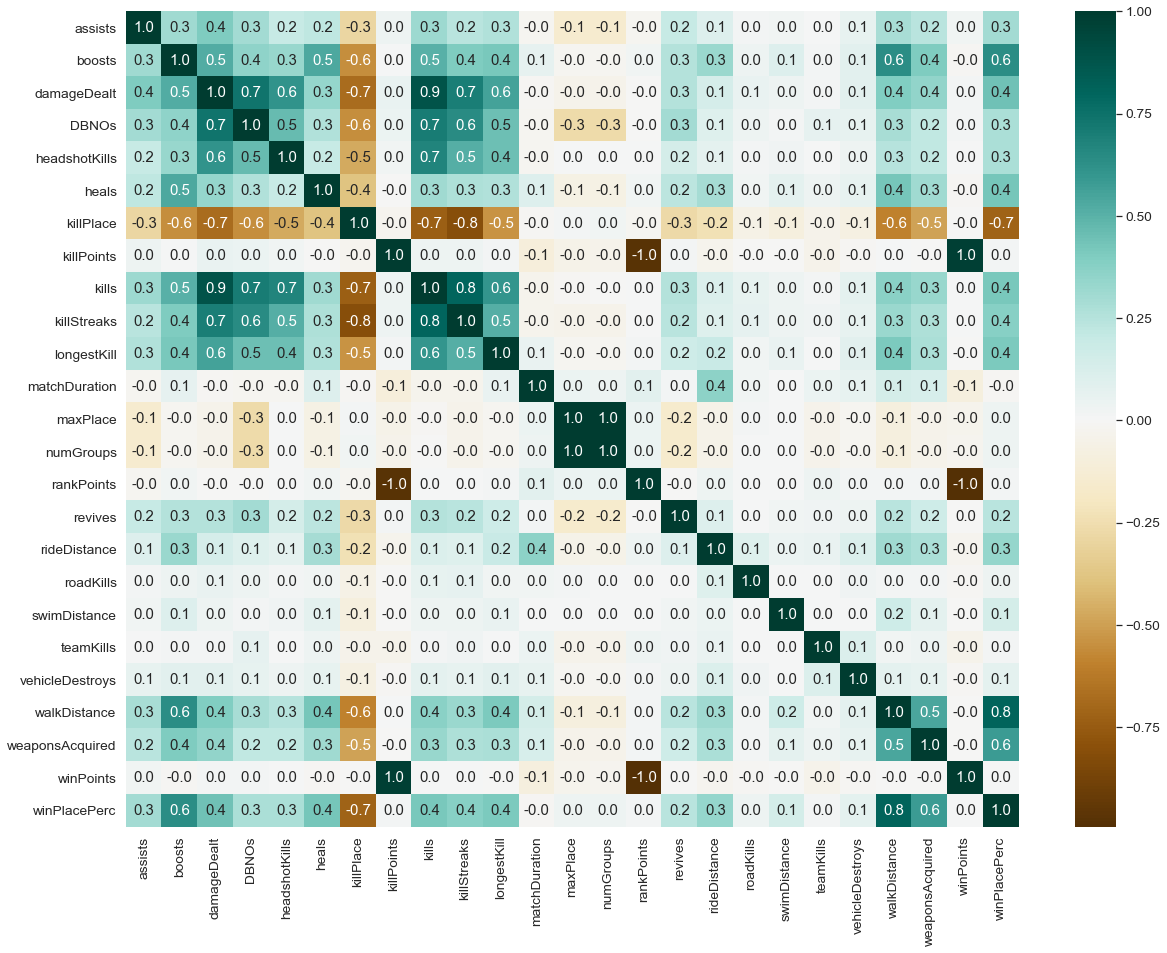

In [134]:
corr = data.corr()
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
plt.show()

##### ANALYSING KILLS

In [135]:
print('A player have a average of {} kills'.format(data['kills'].mean()))

A player have a average of 0.9247833241810259 kills


In [136]:
print('Maximum kills by one player is',data['kills'].max())

Maximum kills by one player is 72


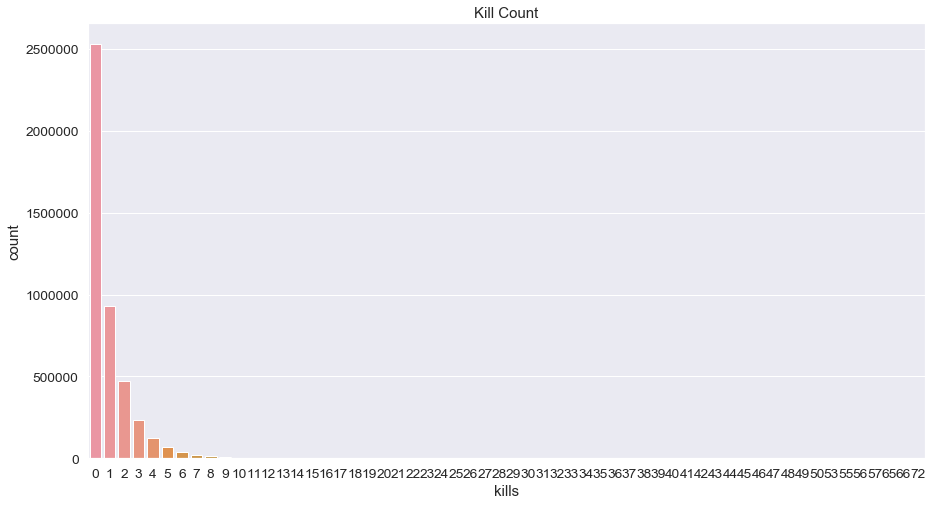

In [137]:
train=data.copy()
train.loc[train['kills']]
plt.figure(figsize=(15,8))
sns.countplot(train['kills'])
plt.title("Kill Count")
plt.show()

Most of people even didn't made a single kill

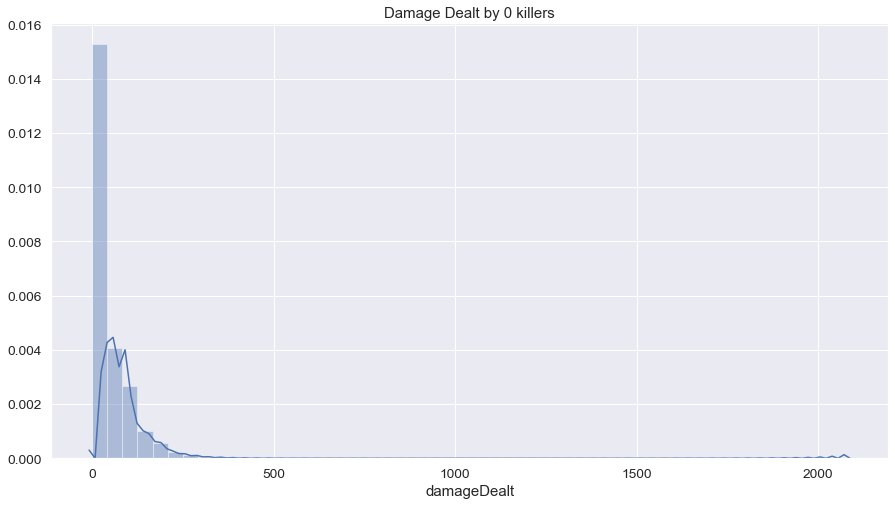

In [138]:
train = data.copy()
train= train[train['kills']==0]# players with Zero kills
plt.figure(figsize=(15,8))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(train['damageDealt'])
plt.show()

In [139]:
nu=len(train[train['winPlacePerc']==1])
pe=(len(train[train['winPlacePerc']==1])/len(data))*100
print(f'{nu} players ({pe}%)  won the match with Zero kill')

16666 players (0.3747723728942384%)  won the match with Zero kill


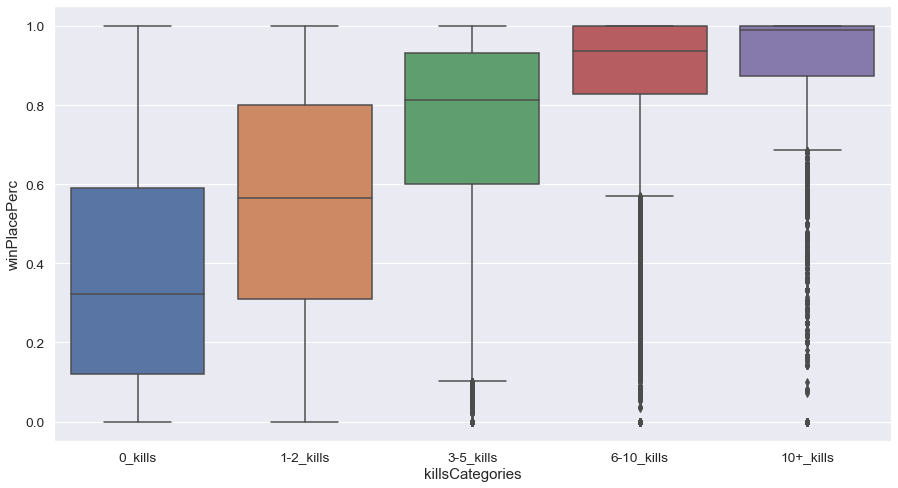

In [140]:
kills = data.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

More number of kills having the highest winning percentage

##### ANALYSING RUNNING

In [141]:
print('{} players walked Zero meters'.format(len(data[data['walkDistance'] == 0])))

99603 players walked Zero meters


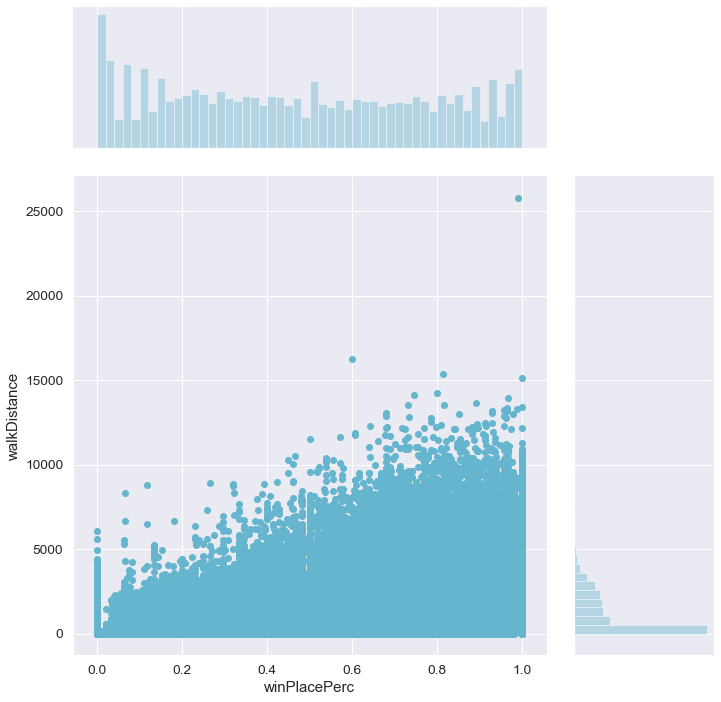

In [142]:
sns.jointplot(x='winPlacePerc', y='walkDistance',  data=data, height=10, ratio=3, color='c')
plt.show()

##### ANALYSING RIDING

In [143]:
print('The Average Person drives around {} m '.format(train['rideDistance'].mean()))

The Average Person drives around 481.0824890136719 m 


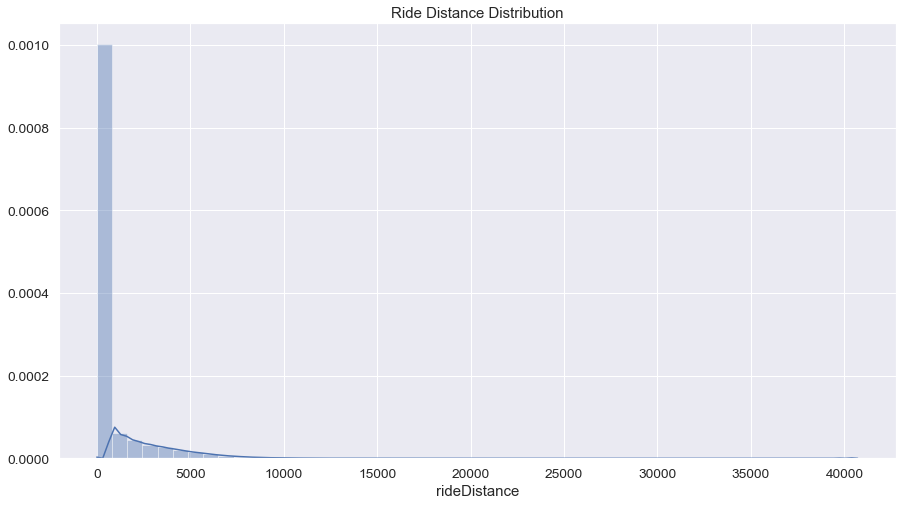

In [144]:
plt.figure(figsize=(15,8))
plt.title("Ride Distance Distribution")
sns.distplot(data['rideDistance'])
plt.show()

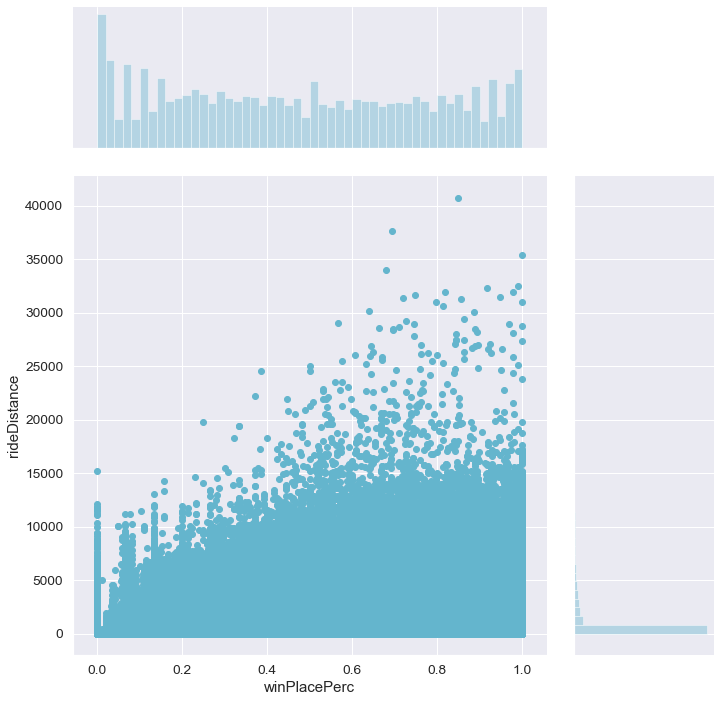

In [145]:
sns.jointplot(x="winPlacePerc", y="rideDistance", data=data, height=10, ratio=3, color="c")
plt.show()

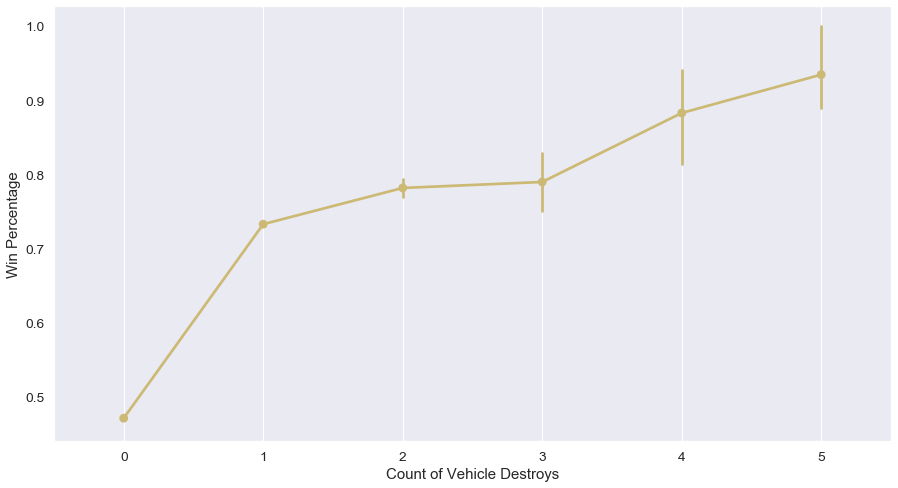

In [146]:
f,ax1 = plt.subplots(figsize =(15,8))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='y')
plt.xlabel('Count of Vehicle Destroys')
plt.ylabel('Win Percentage')
plt.grid()
plt.show()

##### ANALYSING HEALING AND BOOSTING

In [147]:
print('On an average a person uses {} times  heal in the match'.format(data['heals'].mean()))
print('On an average a person uses {} times  boost in the match'.format(data['boosts'].mean()))

On an average a person uses 1.370147196987789 times  heal in the match
On an average a person uses 1.1069077209045448 times  boost in the match


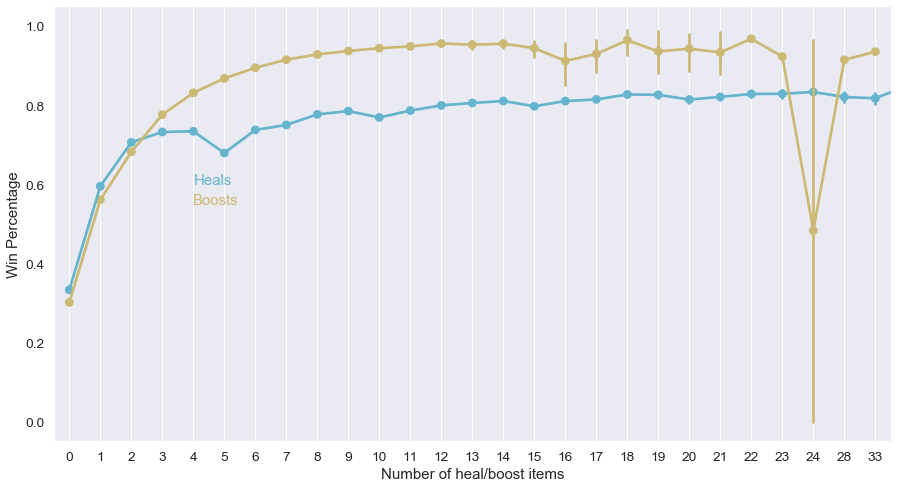

In [148]:
train = data.copy()
f,ax1 = plt.subplots(figsize =(15,8))
sns.pointplot(x='heals',y='winPlacePerc',data=train,color='c')
sns.pointplot(x='boosts',y='winPlacePerc',data=train,color='y')
plt.text(4,0.6,'Heals',color='c')
plt.text(4,0.55,'Boosts',color='y')
plt.xlabel('Number of heal/boost items')
plt.ylabel('Win Percentage')
plt.grid()
plt.show()

In [149]:
solo=len(data[data['numGroups']>50]) #Solo game played by more than 50 different groups
duo = len(data[(data['numGroups']>25) & (data['numGroups']<=50)]) #Duo game can consist of a maximum of 50 groups
squad=len(data[data['numGroups']<=25]) # Squad game can consist a maximum of 25 groups

In [150]:
print('Number of Solo matches :{} Duo matches :{} Squad matches :{}'.format(solo,duo,squad))

Number of Solo matches :709111 Duo matches :3295326 Squad matches :442529


In [151]:
print('On an average a person revives {} times his team mate'.format(data['revives'].mean()))

On an average a person revives 0.16465900571310868 times his team mate


In [155]:
data.shape

(4446965, 29)

#### OUTLIERS OR ANOMALIES DETECTION

In [154]:
data[data['winPlacePerc'].isnull()] # match without a winner is not considerable

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [153]:
data.drop(data[data['winPlacePerc'].isnull()].index,inplace=True)

###### CHECKING ANOMALIES IN KILLING

In [156]:
# Engineer a new feature totalDistance
data['total_Distance'] = data['rideDistance'] + data['walkDistance'] + data['swimDistance']

In [157]:
data['total_Distance']

0           244.800003
1          1445.044556
2           161.800003
3           202.699997
4            49.750000
              ...     
4446961    2311.000000
4446962      81.699997
4446963     790.884033
4446964    2748.000000
4446965    2613.000000
Name: total_Distance, Length: 4446965, dtype: float32

In [158]:
# new feature headshot_rate --- headshots made per kill
data['headshot_rate']=data['headshotKills']/data['kills']
data['headshot_rate']=data['headshot_rate'].fillna(0)

In [159]:
# this is an inhumane conditions but there is no such
data[(data['kills'] >= 40) & (data['weaponsAcquired'] > 55) & (data['total_Distance'] < 100.0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_Distance,headshot_rate
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0,0.0,0,0,23.709999,61,0,0.7000,23.709999,0.250000
672993,da31f191ace8ed,ce9a3c4950a8f2,17dea22cefe62a,10,0,5793.0,0,5,2,1,...,0,0.0,0,0,24.270000,56,0,1.0000,24.270000,0.087719
770454,2ade4369bccd12,9f9e64a3db8384,e024bf51bf1799,12,0,5557.0,0,7,4,1,...,0,0.0,0,0,85.550003,66,0,1.0000,85.550003,0.127273
1378200,f241fdbb4f94c6,fadbbc4cbb3e06,e024bf51bf1799,9,0,3707.0,0,5,1,5,...,0,0.0,0,0,46.709999,72,0,0.7778,46.709999,0.121951


In [160]:
# No one can kill 40 players without healing single time
data[(data['kills'] >= 40) & (data['heals'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_Distance,headshot_rate
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,0,0.0,1,0,718.299988,16,1500,1.0,718.299988,0.952381
2105633,770c02791306c4,48ca6706a90e10,6ee2c835176181,8,0,4272.0,40,34,0,1,...,0,0.0,0,0,80.400002,21,0,1.0,80.400002,0.790698
2316123,dbc81aa64a7e3d,c50fe5c54e8bb6,5d58307bae9b50,8,0,4106.0,31,3,0,1,...,0,0.0,0,0,1282.000000,22,0,1.0,1282.000000,0.075000
2601666,436d1530e9eb00,5c974c2bb9d9f0,fe7043ee6221c8,5,0,4347.0,0,31,0,1,...,0,0.0,0,0,134.300003,36,0,1.0,134.300003,0.584906
3924729,579949f753978c,108f4c00d80882,ff9cd80c0d8fb7,1,2,3680.0,0,35,0,1,...,0,0.0,0,0,1180.000000,2,1500,1.0,1180.000000,0.875000


In [161]:
# droping the anomalies
data.drop(data[(data['kills'] >= 40) & (data['heals'] == 0)].index,inplace=True)

In [162]:
# Hitman who killed more than 10 players and all are headshots (impossible)
data[(data['headshot_rate'] == 1) & (data['kills'] >= 10)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_Distance,headshot_rate
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.000000,8,10,0,1,...,0,0.000000,0,0,2939.0,5,0,0.8462,2939.000000,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.000000,13,11,3,1,...,0,0.000000,0,0,3422.0,8,1560,1.0000,8142.000000,1.0
871244,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.000000,9,13,0,1,...,0,0.000000,0,0,2105.0,5,1587,1.0000,2105.000000,1.0
908815,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.000000,10,10,3,1,...,0,0.000000,2,0,2761.0,7,1519,0.9630,7948.000000,1.0
963463,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.000000,12,10,2,1,...,0,0.000000,0,0,2458.0,4,1562,1.0000,3476.000000,1.0
1079403,1c245ed99b5f96,e42d09a9b8463a,5cec236bce68eb,0,5,1218.000000,8,11,3,1,...,0,0.000000,0,0,2932.0,4,0,1.0000,8178.000000,1.0
1167959,c4f80d4be5c561,b4a7892189b5dd,c7f7733ebbd447,0,4,1065.000000,6,10,1,1,...,0,0.000000,0,0,2450.0,7,1468,1.0000,2858.899902,1.0
1348164,474a641f0a4bcb,2fdad3ca6fb3c0,114499c82f35d7,1,5,1319.000000,11,12,1,1,...,0,0.000000,0,0,3915.0,5,0,1.0000,5963.000000,1.0
1380385,202ce6a55119c5,2df66861f597b4,496700c29a5d44,1,4,1150.000000,4,11,1,1,...,0,0.000000,0,0,3108.0,7,1500,1.0000,3108.000000,1.0
1483199,9d483f7cbb34d4,db5867bc814191,69495e3c478eb9,0,10,1478.000000,8,13,2,1,...,0,140.800003,0,0,2339.0,4,0,1.0000,2479.800049,1.0


In [163]:
# droping the hitman anomalies
data.drop(data[(data['headshot_rate'] == 1) & (data['kills'] >= 10)].index,inplace=True)

In [164]:
# Create feature killsWithoutMoving
data['killsWithoutMoving'] = ((data['kills'] > 0) & (data['total_Distance'] == 0))

In [165]:
data[data['killsWithoutMoving']]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_Distance,headshot_rate,killsWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.000000,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,0.0,0.000000,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.600006,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,0.0,0.000000,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.000000,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,0.0,0.200000,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.800003,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,0.0,0.000000,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.000000,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,0.0,1.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440232,1f3a6d69d22c7e,60b2849191c539,ff9cd80c0d8fb7,0,0,4.316000,0,0,0,61,...,0.0,0,0,0.0,7,1500,0.8889,0.0,0.000000,True
4440898,a089cb33a75968,eda174acfb503b,4c6b1a0e4cb346,0,0,90.830002,0,0,4,42,...,0.0,0,0,0.0,8,0,0.0000,0.0,0.000000,True
4440927,0634c650048997,5ccccee03a7f17,fc0bbecba8db99,2,2,909.099976,7,2,16,26,...,0.0,0,0,0.0,7,1500,0.6000,0.0,0.333333,True
4441511,f5d385cadfab7e,a068f79011113c,fc0bbecba8db99,6,2,696.400024,9,2,0,18,...,0.0,1,0,0.0,16,1500,0.9000,0.0,0.222222,True


In [166]:
# Drop kill without moving players
data.drop(data[data['killsWithoutMoving']].index, inplace=True)

In [167]:
# players who killed from 1km distance
data[data['longestKill'] >= 1000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_Distance,headshot_rate,killsWithoutMoving
202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.900024,5,1,1,5,...,0.000000,0,1,3052.000000,9,0,0.9231,3775.199951,0.250000,False
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.000000,8,5,7,18,...,0.000000,0,0,48.869999,38,1500,0.5385,48.869999,0.454545,False
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.000000,0,0,0,9,...,0.000000,0,0,1264.000000,26,0,1.0000,2981.000000,0.000000,False
656553,9948b058562163,c8cb8491112bf6,0104eeb664494d,6,0,1410.000000,17,5,0,3,...,0.000000,0,0,29.209999,30,1500,0.6000,29.209999,0.312500,False
803632,4e7e6c74e3c57d,94698690918933,da91b0c3d875f8,0,0,196.800003,0,0,0,51,...,0.000000,0,0,1074.000000,22,0,0.0000,3159.000000,0.000000,False
895411,1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.000000,11,5,0,5,...,0.000000,0,0,569.500000,18,0,0.9091,569.500000,0.500000,False
1172437,303a93cfa1f46c,8795d39fd0df86,9c8962b58bb3e3,2,1,329.299988,0,0,2,45,...,0.000000,0,0,832.500000,9,1500,0.2857,832.500000,0.000000,False
1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.000000,0,7,0,1,...,0.000000,0,0,2848.000000,4,1500,0.9412,2848.000000,0.466667,False
1642712,91966848e08e2f,0ee4fbd27657c9,17dea22cefe62a,3,2,2103.000000,0,4,11,11,...,0.000000,0,0,235.300003,41,0,0.5000,235.300003,0.173913,False
2015559,5ff0c1a9fab2ba,2d8119b1544f87,904cecf36217df,3,3,1302.000000,0,6,5,15,...,0.000000,0,0,133.199997,43,0,0.6000,133.199997,0.545455,False


In [168]:
# Drop longestKill 
data.drop(data[data['longestKill'] >= 1000].index, inplace=True)

In [169]:
# Players who got more than 10 roadKills
data[data['roadKills'] > 10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_Distance,headshot_rate,killsWithoutMoving
2733926,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,1,...,5.297,0,0,1277.000000,0,1371,0.4286,1282.302002,0.000000,False
2767999,34193085975338,bd7d50fa305700,a22354d036b3d6,0,0,1102.0,0,0,0,1,...,0.000,0,0,816.599976,5,1533,0.4713,4934.600098,0.000000,False
2890740,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.0,0,1,11,1,...,0.000,0,0,3150.000000,4,1568,1.0000,5876.000000,0.050000,False
3524413,9d9d044f81de72,8be97e1ba792e3,859e2c2db5b125,0,3,1866.0,0,5,7,1,...,0.000,0,0,1041.000000,10,1606,0.9398,7853.000000,0.277778,False


In [170]:
data.drop(data[data['roadKills'] > 10].index,inplace=True)

###### CHECKING ANOMALIES IN TRAVELLING

In [171]:
# walking around 10 km without a single kill 
data[(data['walkDistance'] >= 10000) & (data['kills'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_Distance,headshot_rate,killsWithoutMoving
23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1,0.000000,0,0,0,44,...,9.882000,0,0,13530.0,7,0,0.8163,13540.302734,0.0,False
34344,5a591ecc957393,6717370b51c247,a15d93e7165b05,0,3,23.219999,0,0,1,34,...,40.869999,0,0,10030.0,7,1533,0.9474,10070.907227,0.0,False
68590,8c0d9dd0b4463c,c963553dc937e9,926681ea721a47,0,1,32.340000,0,0,1,46,...,45.820000,0,0,11590.0,3,1563,0.8333,12483.620117,0.0,False
94400,d441bebd01db61,7e179b3366adb8,923b57b8b834cc,1,1,73.080002,0,0,3,27,...,45.630001,0,0,10440.0,6,1488,0.8194,11490.629883,0.0,False
125103,db5a0cdc969dcb,50cc466757950e,c306a9745c4c1d,0,4,37.730000,0,0,7,47,...,38.759998,0,0,12790.0,5,1500,0.7340,12828.797852,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230073,4c653a61485755,db1a6c5728eacf,e7d6acf956c0c2,0,4,152.300003,1,0,6,54,...,27.230000,0,0,10090.0,2,1603,0.7708,10738.230469,0.0,False
4288445,338cd1d3f8d66c,9475facd00f603,63d3ff59a01106,0,2,87.470001,0,0,10,46,...,139.600006,0,0,10370.0,7,0,0.7778,10509.625000,0.0,False
4306598,df451c374c4c9b,419e66ee851227,31bc0ed3bc2607,0,1,0.000000,0,0,11,43,...,29.520000,0,0,12970.0,3,0,0.8519,12999.522461,0.0,False
4370543,c8bdfbbb850447,fbb7a76b2b8d11,9968551b4b470a,0,0,37.840000,0,0,1,44,...,7.786000,0,0,10370.0,5,1589,0.8776,10377.788086,0.0,False


In [172]:
data.drop(data[(data['walkDistance'] >= 10000) & (data['kills'] == 0)].index,inplace=True)

In [173]:
# riding around 20 km without a single kill
data[(data['rideDistance'] >= 20000) & (data['kills'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_Distance,headshot_rate,killsWithoutMoving
63015,adb7dae4d0c10a,8ede98a241f30a,8b36eac66378e4,0,0,0.000000,0,0,0,55,...,0.0,0,0,185.399994,0,0,0.5376,22065.400391,0.0,False
72763,198e5894e68ff4,ccf47c82abb11f,d92bf8e696b61d,0,0,0.000000,0,0,0,46,...,0.0,1,0,687.200012,9,0,0.7917,21197.199219,0.0,False
140097,9944fbbea2b91e,18b4d5f4bb1906,d9d4a3e50cae75,1,0,12.550000,0,0,0,53,...,0.0,0,0,63.230000,0,1514,0.5000,21293.230469,0.0,False
297186,88904c200175b6,012a61a01e146e,7a270c25e9b70c,0,1,0.000000,0,0,1,47,...,0.0,0,0,297.299988,3,0,0.7447,29267.300781,0.0,False
371098,f7071357f6b762,f3ee20821f4627,ac47c86bf385bf,0,0,72.919998,1,0,0,45,...,0.0,0,0,242.100006,4,0,0.6875,21942.099609,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248221,77ea3e976c1f0a,09b46137e22b8a,2929aacbe88dcd,0,1,0.000000,0,0,1,59,...,0.0,0,0,249.300003,1,0,0.4483,21079.300781,0.0,False
4301013,4985541631d98b,d0e454dc0ac3cf,3f819651e3c666,0,0,15.470000,0,0,0,53,...,0.0,1,0,50.259998,0,1489,0.5000,25080.259766,0.0,False
4386384,5d472a1fcad9c9,f94054ff58eab0,ad37f12700c1ba,0,0,0.000000,0,0,0,47,...,0.0,0,0,470.100006,3,1500,0.7778,26690.099609,0.0,False
4404738,810bcb9e6ff249,605266536c0f45,7f817462a20c19,0,1,84.400002,0,0,0,38,...,0.0,1,0,114.699997,0,1523,0.6438,24344.699219,0.0,False


In [174]:
data.drop(data[(data['rideDistance'] >= 30000) & (data['kills'] == 0)].index,inplace=True)

In [175]:
# A player without travelling a single meter 
data[(data['total_Distance'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_Distance,headshot_rate,killsWithoutMoving
29,ac5b57ff39979c,857cc55b2b6001,e019e04dee4f19,0,0,0.0,0,0,0,87,...,0.0,0,0,0.0,0,0,0.0000,0.0,0.0,False
116,6adb021f5165ff,58e5500bd40898,de5c692fe25a73,0,0,0.0,0,0,0,68,...,0.0,0,0,0.0,0,847,0.0000,0.0,0.0,False
151,a2bbe20aa8789d,926e8a09bab249,e36e4203ed4831,0,0,0.0,0,0,0,92,...,0.0,0,0,0.0,0,765,0.0000,0.0,0.0,False
237,baaa694658e085,d034728f22cff7,fa71620624d3e7,0,0,0.0,0,0,0,94,...,0.0,0,0,0.0,0,1510,0.0000,0.0,0.0,False
283,3ab8128e6bcbe6,bb52a209f2e938,aabd2650b129e2,0,0,0.0,0,0,0,84,...,0.0,0,0,0.0,0,0,0.1277,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446843,56f1ff8594a328,63008ee9676bc3,b3f07953e112dc,0,0,0.0,0,0,0,99,...,0.0,0,0,0.0,0,0,0.0000,0.0,0.0,False
4446849,19d2b52c9e17a3,f8a952ce9ab7aa,2afb2889026133,0,0,0.0,0,0,0,90,...,0.0,0,0,0.0,0,1363,0.0412,0.0,0.0,False
4446905,f93dfebceecc59,c54ca5bb9df107,e1da3a1ee799ef,0,0,0.0,0,0,0,89,...,0.0,0,0,0.0,1,0,0.0417,0.0,0.0,False
4446926,e0c791ea3c4644,e18240dcce54f9,827639896a20cb,0,0,0.0,0,0,0,87,...,0.0,0,0,0.0,0,916,0.0000,0.0,0.0,False


In [176]:
data.drop(data[(data['total_Distance'] == 0)].index,inplace=True)

In [177]:
# how a player can kill or ride witout walking a single meter
data[(data['walkDistance'] == 0) & (data['rideDistance'] > 0) & (data['kills'] > 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_Distance,headshot_rate,killsWithoutMoving
219621,49e86bcbb74918,5bf4ac7f5f89a0,05a97d10e3cf81,0,0,100.000000,1,0,0,38,...,0.0,0,0,0.0,0,0,0.0000,673.099976,0.0,False
1051447,c43116d1c3d4e5,bd09c97b67800a,aad60eee7eeb79,0,0,102.199997,0,0,0,34,...,0.0,0,0,0.0,0,1532,0.1250,1757.000000,0.0,False
1053213,4a8011f19b0e0e,037c89b0cef255,238171821a1d0e,1,0,100.000000,1,0,0,38,...,0.0,0,0,0.0,0,1747,0.0638,36.240002,0.0,False
1166930,553f199b5538c5,560c2ba9dcbbd0,afb05e37d884fc,2,0,168.500000,1,0,0,45,...,0.0,0,0,0.0,0,1499,0.0667,391.799988,0.0,False
1479750,bcdf0f6c5d08bf,ea2ed2cc5955dd,2b59ed013eaf15,0,0,100.000000,1,0,0,46,...,0.0,0,0,0.0,0,0,0.0612,468.299988,0.0,False
2221273,a280df87d394fc,61042f8c96538c,a0e8fe0599288c,0,0,100.000000,1,0,0,37,...,0.0,0,0,0.0,0,0,0.1522,534.500000,0.0,False
2382410,adbda59d2f11cd,343d453ffb18c8,cbb5f864c6f532,0,0,100.000000,1,0,0,43,...,0.0,0,0,0.0,0,0,0.0000,262.700012,0.0,False
2471705,b968373063f5a8,536e9c19659ce8,61c90034dc8174,0,0,93.470001,1,0,0,38,...,0.0,0,0,0.0,0,0,0.1429,1360.000000,0.0,False
2907639,2bf1d34142358b,71c15011651348,08dfa30b9390f7,4,0,578.000000,0,0,6,30,...,0.0,0,0,0.0,29,0,0.4000,1277.000000,0.0,False
3778837,ca3ca72549b07f,68a0c84f3b09aa,f72f06cafb3349,0,0,144.300003,2,0,0,20,...,0.0,0,0,0.0,0,1496,0.0000,415.399994,0.0,False


In [178]:
data.drop(data[(data['walkDistance'] == 0) & (data['rideDistance'] > 0) & (data['kills'] > 0)].index,inplace=True)

In [179]:
# How can you swim for more than 2 km without breathing?
data[data['swimDistance'] >= 2000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_Distance,headshot_rate,killsWithoutMoving
177973,c2e9e5631f4e54,23213058f83abe,f01eb1073ef377,0,5,78.120003,1,0,1,47,...,2295.0,0,0,1002.000000,4,1466,0.9592,3297.000000,0.000000,False
274258,ba5e3dfb5a0fa0,383db055216ec2,d6e13468e28ab4,0,4,53.320000,0,0,16,39,...,2148.0,0,0,2276.000000,5,0,0.9600,10113.000000,0.000000,False
1005337,d50c9d0e65fe2a,4996575c11abcb,668402592429f8,0,1,503.000000,4,3,1,6,...,2718.0,0,0,4691.000000,5,1516,1.0000,10740.000000,1.000000,False
1195818,f811de9de80b70,d08ddf7beb6252,8a48703ab52ec8,0,7,352.299988,3,1,6,4,...,2668.0,0,0,415.100006,10,1499,1.0000,3083.100098,0.200000,False
1227362,a33e917875c80e,5b72674b42712b,5fb0d8b1fc16cf,0,1,589.200012,3,1,1,46,...,3823.0,0,0,995.299988,9,0,1.0000,4818.299805,0.500000,False
1889163,bd8cc3083a9923,1d5d17140d6fa4,8e2e6022d6e5c8,0,0,0.000000,0,0,0,47,...,2484.0,0,0,1966.000000,3,0,0.5833,5314.000000,0.000000,False
2065940,312ccbb27b99aa,47c7f4d69e2fb1,b4b11756321f3a,1,3,49.590000,0,0,5,48,...,3514.0,0,0,4296.000000,8,1492,0.8511,9899.000000,0.000000,False
2327586,8773d0687c6aae,b17f46f9f6666c,56ee5897512c86,3,1,474.399994,2,0,0,7,...,2387.0,0,0,7.546000,6,0,1.0000,2394.545898,0.000000,False
2784855,a8653b87e83892,383db055216ec2,d6e13468e28ab4,1,4,843.799988,5,5,2,2,...,2206.0,0,0,4687.000000,4,0,0.9600,9926.000000,0.714286,False
3359439,3713b36e1ba9e1,1f7aed9240864a,584447ed875c85,0,0,0.000000,0,0,0,77,...,2338.0,0,0,1750.000000,0,1518,0.2143,4088.000000,0.000000,False


In [180]:
data.drop(data[data['swimDistance'] >= 2000].index,inplace=True)

###### CHECKING ANOMALIES IN WEAPONS 

In [181]:
# is it possible to loot more than 40 weapons in a game
data[data['weaponsAcquired'] >= 40]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_Distance,headshot_rate,killsWithoutMoving
1292,919f57a28a5e02,79a34f910375bc,b181e5bc4f0c1d,6,0,1750.0,0,6,2,7,...,0.0,0,0,1137.000000,43,0,0.7143,2794.000000,0.400000,False
38348,a0dafc8b8cba11,952b4d4254f556,904cecf36217df,2,0,1763.0,0,10,1,3,...,0.0,1,0,17.360001,46,0,0.2000,17.360001,0.666667,False
42857,93ed29a0b51966,b4583304a6b039,e024bf51bf1799,5,0,1564.0,0,3,2,15,...,0.0,0,0,1173.000000,50,0,0.2222,2488.000000,0.214286,False
50279,fede4e068062fb,899307b1010c21,a9e84c456cc859,3,0,1691.0,0,3,7,6,...,0.0,0,0,165.300003,52,0,0.6667,165.300003,0.157895,False
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,0.0,0,0,48.820000,48,1500,0.8571,48.820000,0.200000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4350616,41fd91bea64d2d,44e97e0e41fbb7,17dea22cefe62a,5,0,2529.0,0,4,4,7,...,0.0,0,0,1022.000000,50,0,0.7143,5828.000000,0.153846,False
4371888,d6d1e1ff0a3bc1,d95a42fab14846,1e573980b3ee3c,5,0,1350.0,0,5,16,17,...,0.0,0,0,2240.000000,40,1500,0.5000,2343.800049,0.333333,False
4381091,97bf68b6df93c2,afc31d91549183,17c643ab998ecb,7,0,2360.0,0,2,11,5,...,0.0,1,0,295.299988,73,1500,0.3333,295.299988,0.074074,False
4399662,8800992f7dd530,87e52e1a6b0a73,1e573980b3ee3c,1,0,1999.0,0,1,8,5,...,0.0,0,0,111.800003,59,1500,0.3333,111.800003,0.038462,False


In [182]:
data.drop(data[data['weaponsAcquired'] >= 50].index,inplace=True)

In [183]:
# can a person able to heal more than 40 times in a game
data[data['heals'] >= 30]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_Distance,headshot_rate,killsWithoutMoving
16417,15f06a2e7b66af,a2c89a6b2fd7ce,4983ab459ce98c,0,4,227.500000,0,0,32,24,...,58.209999,0,0,2619.0,5,1496,0.8687,2677.209961,0.00,False
18405,63ab976895d860,927eeba5614c4f,69473402649f11,0,2,0.000000,0,0,47,43,...,0.000000,0,0,1387.0,6,0,0.9368,6854.000000,0.00,False
26412,a223b06c1fd4d1,18d14b57790424,46bb8eaf9bf8ab,0,3,975.299988,6,2,32,1,...,8.995000,0,0,2272.0,5,0,0.7407,2702.695068,0.20,False
32939,c069f2a15b24f7,471704a9a558f9,4aad368e132613,0,4,0.000000,0,0,31,31,...,0.000000,0,0,2262.0,9,1500,0.9000,3203.100098,0.00,False
40363,91a8cea28d1d66,a1de250149bab7,4d0277f0d45c3c,0,1,0.000000,0,0,30,43,...,59.400002,0,0,4518.0,7,0,0.8646,4577.399902,0.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423005,c545c678842cd0,971a955886319b,2677afda35d82b,0,8,509.700012,0,1,33,4,...,0.000000,0,1,1868.0,5,0,0.9355,7924.000000,0.25,False
4435189,73b25112a4b474,0c41134922b9b2,b20de15e412e5b,1,2,226.000000,0,0,32,41,...,0.000000,0,0,2315.0,10,0,0.9310,10312.000000,0.00,False
4436938,ecf4468be5302c,8a934182175702,4b1eb1af720e23,0,3,0.000000,0,0,36,42,...,0.000000,0,0,2386.0,8,0,0.8681,2834.100098,0.00,False
4438304,97a7862329ed17,7a0f54f8743b9f,b6997081e44d95,0,2,52.389999,0,0,38,45,...,0.000000,0,0,1831.0,3,0,0.8800,3737.000000,0.00,False


In [184]:
data.drop(data[data['heals'] >= 30].index,inplace=True)

In [185]:
data.shape

(4348395, 32)

###### SAVING THE CLEANED DATA

In [186]:
data.to_csv('C:/Users/mugesh/Projects/Pubg/cleaned_data.csv', index=False)

###### READING THE CLEANED DATA

In [350]:
# reducing the cleaned_data memory 
cleaned_data=pd.read_csv('C:/Users/mugesh/Projects/Pubg/cleaned_data.csv')
cleaned_data= reduce_mem_usage(cleaned_data)

Memory usage of dataframe is 1032.59 MB --> 377.37 MB (Decreased by 63.5%)


In [351]:
cleaned_data.sample(4)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_Distance,headshot_rate,killsWithoutMoving
1568845,a411fe703799f6,018378a1fcd3b3,84d7e32c95913a,0,3,243.000000,0,0,1,10,...,19.780001,0,0,3291.000000,5,0,0.8750,6113.779785,0.0,0.0
1617044,b12a33f8dc5aad,efcc566dfb74ee,d9e243538a32d2,0,0,78.570000,1,0,0,16,...,0.000000,0,0,690.799988,2,0,0.1111,690.799988,0.0,0.0
379720,ae4e780bf0c3d5,780aebf6a78ff1,c56b49ebc7952c,0,4,68.599998,1,0,3,20,...,0.000000,0,0,3323.000000,7,0,0.9362,3323.000000,0.0,0.0
358168,8ab2e1368e2900,7249103ab2c164,40a593cfa78aed,0,0,181.699997,0,1,0,41,...,0.000000,0,0,77.809998,1,0,0.0370,77.809998,1.0,0.0


In [352]:
# new feature players joined in the match
cleaned_data['playersJoined'] = cleaned_data.groupby('matchId')['matchId'].transform('count')

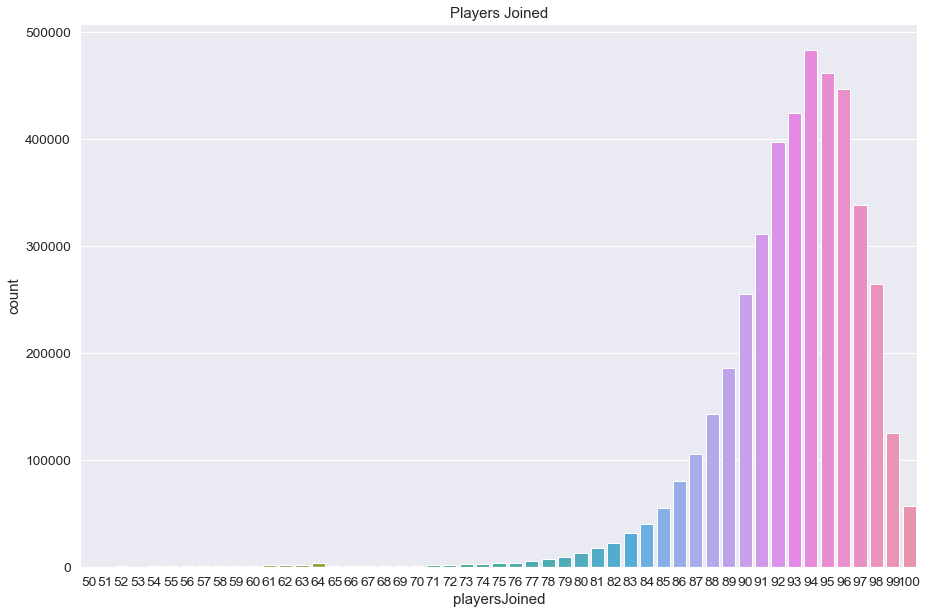

In [353]:
datat = cleaned_data.copy()
datat = datat[datat['playersJoined']>49]
plt.figure(figsize=(15,10))
sns.countplot(datat['playersJoined'])
plt.title("Players Joined",fontsize=15)
plt.show()

In [354]:
# creating new features
cleaned_data['healthItems'] = cleaned_data['heals'] + cleaned_data['boosts']
cleaned_data['headshotKillRate'] = cleaned_data['headshotKills'] / cleaned_data['kills']
cleaned_data['killsOverWalkDistance'] = cleaned_data['kills'] / cleaned_data['walkDistance']
cleaned_data['killsOverDistance'] = cleaned_data['kills'] / cleaned_data['total_Distance']
cleaned_data['walkDistancePerSec'] = cleaned_data['walkDistance'] / cleaned_data['matchDuration']

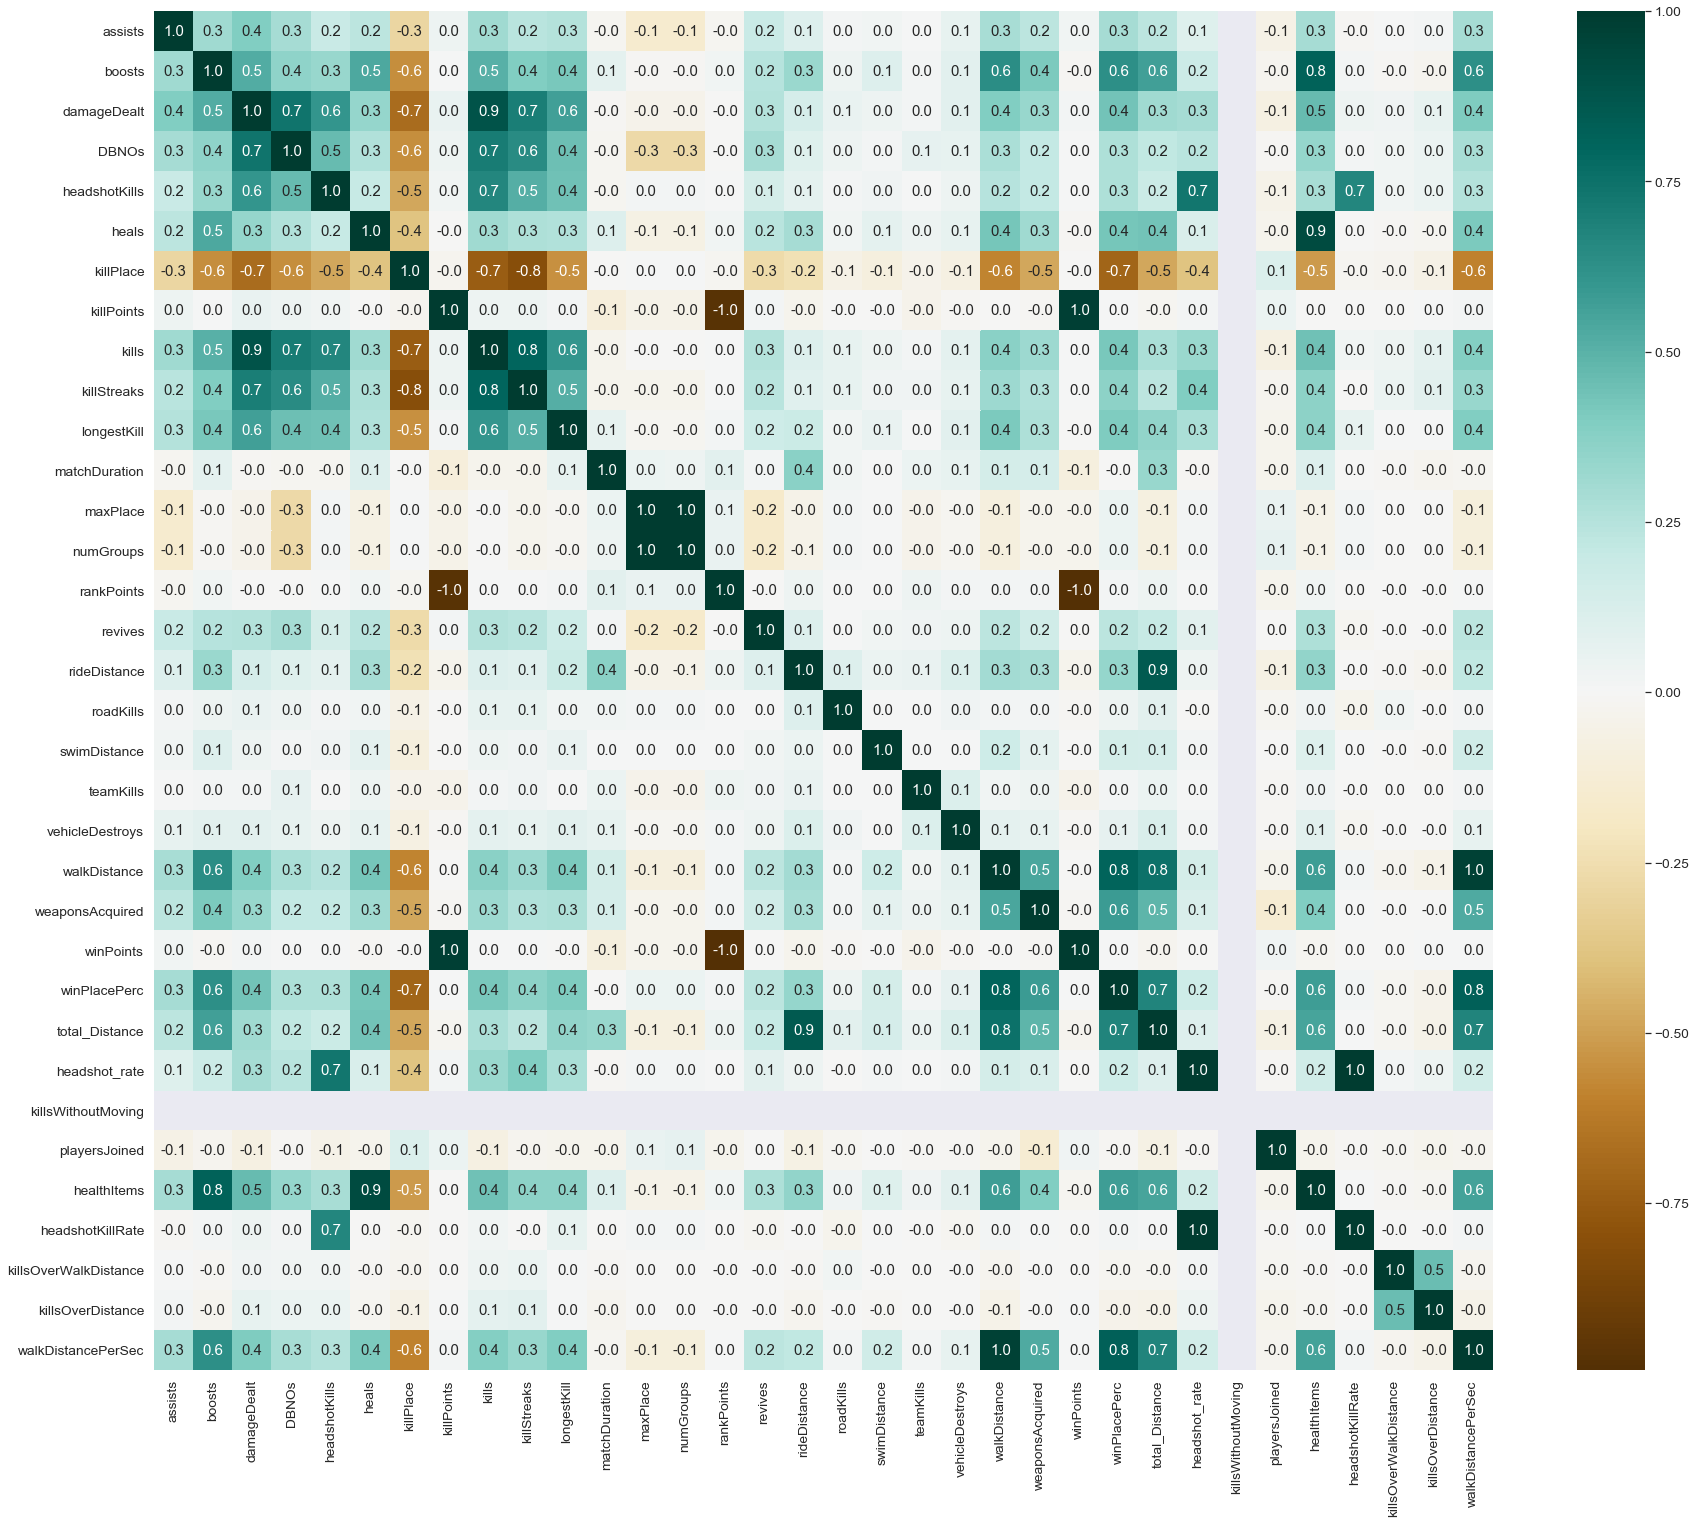

In [355]:
cols_to_fit = [col for col in cleaned_data.columns]
corr = cleaned_data[cols_to_fit].corr()
f,ax = plt.subplots(figsize=(30, 25))
sns.heatmap(cleaned_data[cols_to_fit].corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

In [242]:
cleaned_data.drop(['killPoints','matchDuration','maxPlace','numGroups','rankPoints','roadKills','teamKills','winPoints', 'playersJoined', 'killsWithoutMoving'], axis=1, inplace=True)

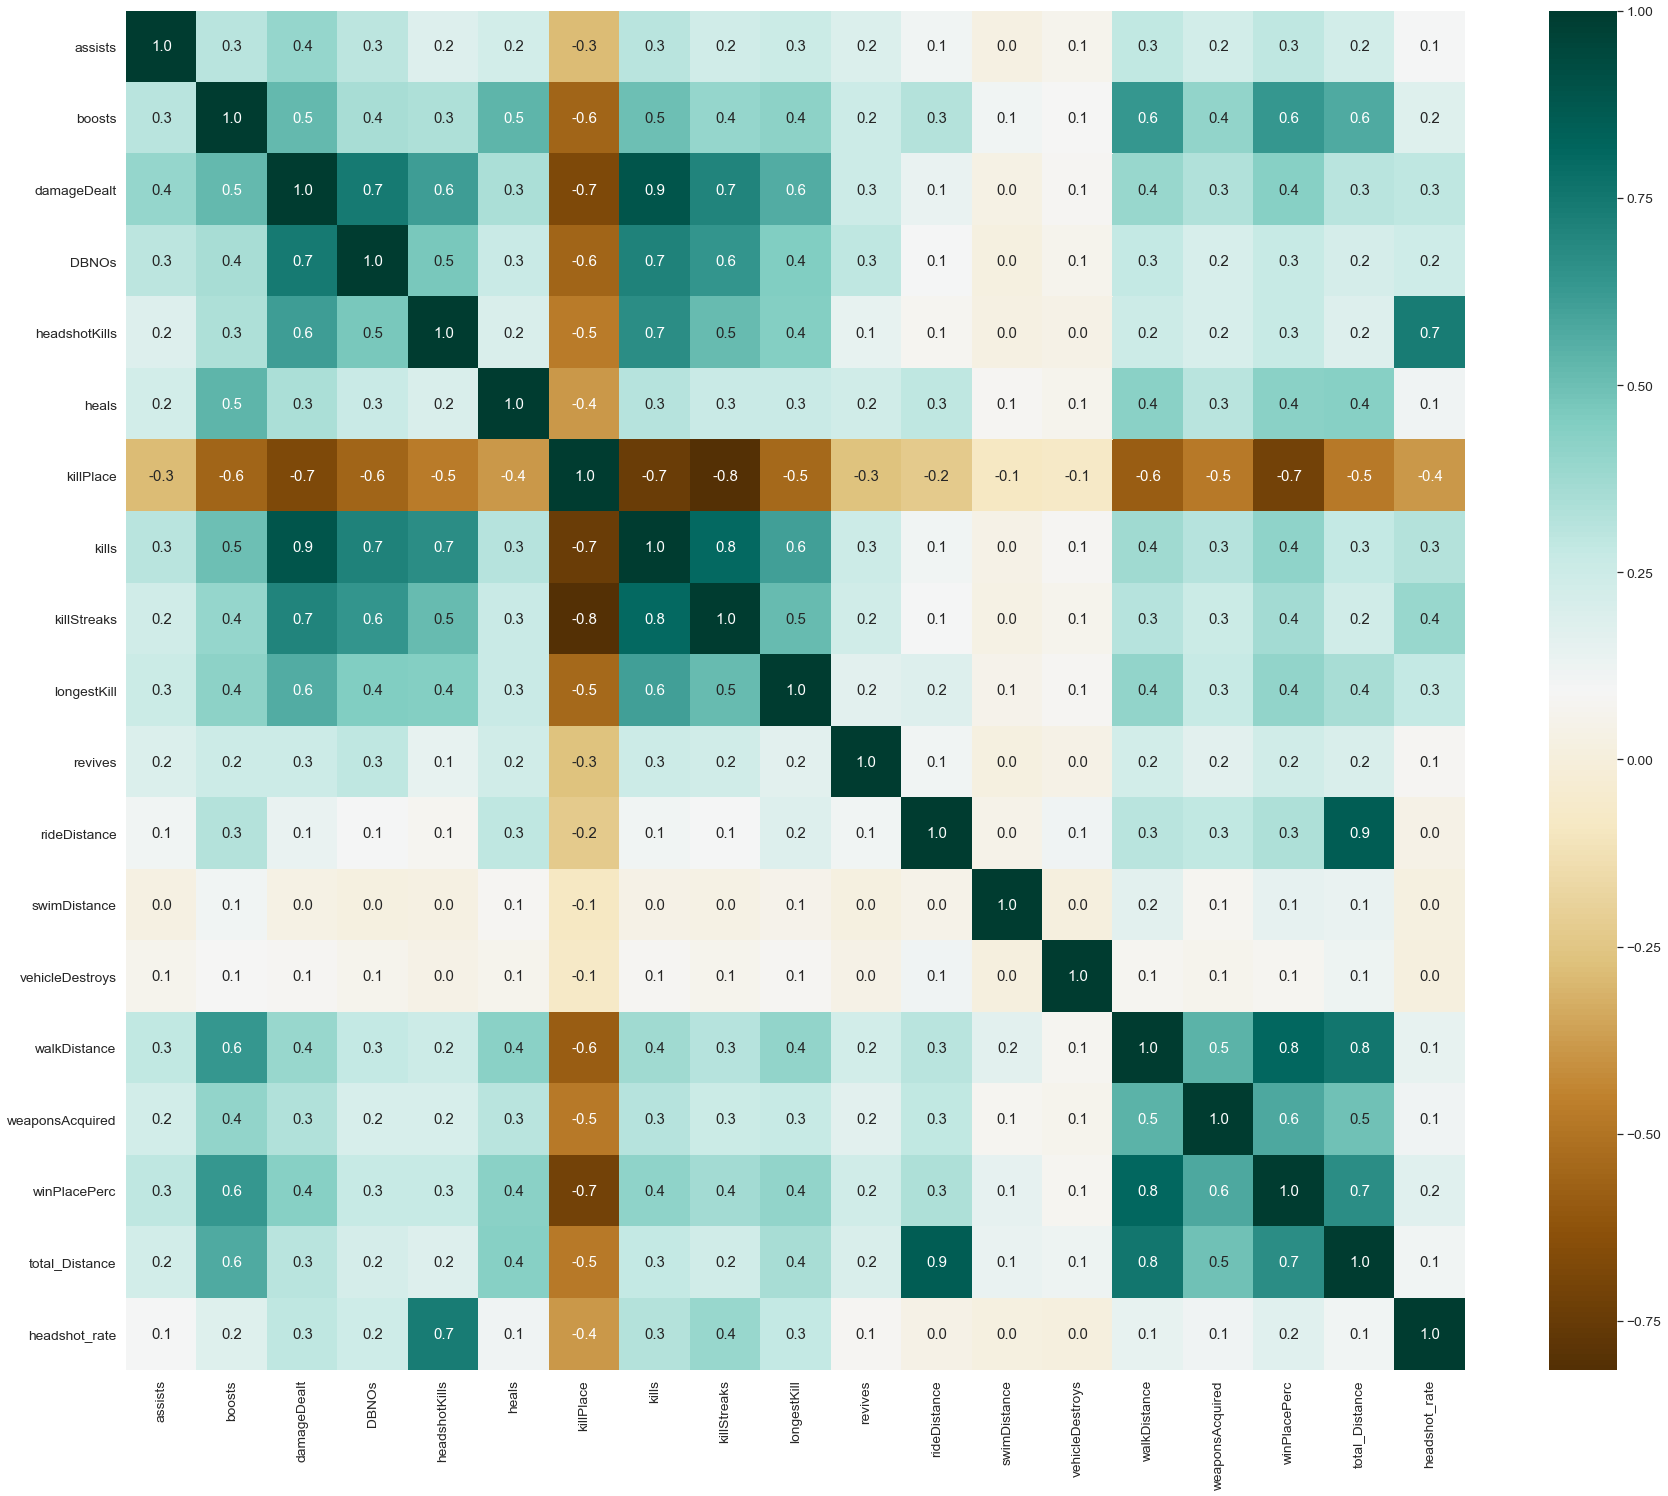

In [243]:
cols_to_fit = [col for col in cleaned_data.columns]
corr = cleaned_data[cols_to_fit].corr()
f,ax = plt.subplots(figsize=(30, 25))
sns.heatmap(cleaned_data[cols_to_fit].corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

In [244]:
cleaned_data.drop(['killPlace','Id'], axis=1, inplace=True)

In [245]:
cleaned_data

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,...,matchType,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,total_Distance,headshot_rate
0,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,0,0,...,squad-fpp,0,0.0000,0.000,0,244.800003,1,0.4444,244.800003,0.0
1,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,0,0,...,squad-fpp,0,0.0045,11.040,0,1434.000000,5,0.6400,1445.044556,0.0
2,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,0,0,...,duo,0,0.0000,0.000,0,161.800003,2,0.7755,161.800003,0.0
3,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,0,0,...,squad-fpp,0,0.0000,0.000,0,202.699997,3,0.1667,202.699997,0.0
4,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,1,1,...,solo-fpp,0,0.0000,0.000,0,49.750000,2,0.1875,49.750000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348390,d238e426f50de7,18492834ce5635,0,0,0.000000,0,0,0,0,0,...,squad-fpp,0,1292.0000,0.000,0,1019.000000,3,0.1786,2311.000000,0.0
4348391,408cdb5c46b2ac,ee854b837376d9,0,1,44.150002,0,0,0,0,0,...,solo,0,0.0000,0.000,0,81.699997,6,0.2935,81.699997,0.0
4348392,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.060001,0,0,0,0,0,...,squad-fpp,0,0.0000,2.184,0,788.700012,4,0.4815,790.884033,0.0
4348393,c2223f35411394,c9c701d0ad758a,0,4,180.399994,1,1,2,2,1,...,squad-fpp,2,0.0000,0.000,0,2748.000000,8,0.8000,2748.000000,0.5


In [246]:
cleaned_data.dtypes

groupId             object
matchId             object
assists               int8
boosts                int8
damageDealt        float32
DBNOs                 int8
headshotKills         int8
heals                 int8
kills                 int8
killStreaks           int8
longestKill        float32
matchType           object
revives               int8
rideDistance       float32
swimDistance       float32
vehicleDestroys       int8
walkDistance       float32
weaponsAcquired       int8
winPlacePerc       float32
total_Distance     float32
headshot_rate      float32
dtype: object

In [247]:
#saving highly correlated data
cleaned_data.to_csv('C:/Users/mugesh/Projects/Pubg/cleaned_data1.0.csv', index=False)

In [386]:
# Reading the highly correlated data
df=pd.read_csv('C:/Users/mugesh/Projects/Pubg/cleaned_data1.0.csv')
df=reduce_mem_usage(df)

Memory usage of dataframe is 696.69 MB --> 273.70 MB (Decreased by 60.7%)


In [387]:
df.shape

(4348395, 21)

##### DEALING WITH CATEGORICAL VARIABLES

In [388]:
# Turn groupId and match Id into categorical types
df['groupId'] = df['groupId'].astype('category')
df['matchId'] = df['matchId'].astype('category')


# Get category coding for groupId and matchID
df['groupId_cat'] = df['groupId'].cat.codes
df['matchId_cat'] = df['matchId'].cat.codes

# Get rid of old columns
df.drop(columns=['groupId', 'matchId'], inplace=True)


In [389]:
#Turn groupId and match Id into categorical types
df['matchType'] = df['matchType'].astype('category')


# Get category coding for groupId and matchID
df['matchType_cat'] = df['matchType'].cat.codes

# Get rid of old columns
df.drop(columns=['matchType'], inplace=True)



In [390]:
df.dtypes

assists               int8
boosts                int8
damageDealt        float32
DBNOs                 int8
headshotKills         int8
heals                 int8
kills                 int8
killStreaks           int8
longestKill        float32
revives               int8
rideDistance       float32
swimDistance       float32
vehicleDestroys       int8
walkDistance       float32
weaponsAcquired       int8
winPlacePerc       float32
total_Distance     float32
headshot_rate      float32
groupId_cat          int32
matchId_cat          int32
matchType_cat         int8
dtype: object

##### BUILDING A MACHINE LEARNING MODEL

In [411]:
# Build a model with a sample of 500000 data points 
data_sample=df.sample(500000)

In [392]:
data_sample.shape

(500000, 21)

In [393]:
data_model=data_sample.copy()
X=data_model.drop('winPlacePerc',axis=1)
y=data_model['winPlacePerc'].values

In [394]:
# splitting the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [395]:
# Using XGBoostRegressor
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,y_train)
predicted_value=model.predict(X_test)

In [396]:
from sklearn.metrics import r2_score
r2_score(predicted_value,y_test)

0.7508527366052637

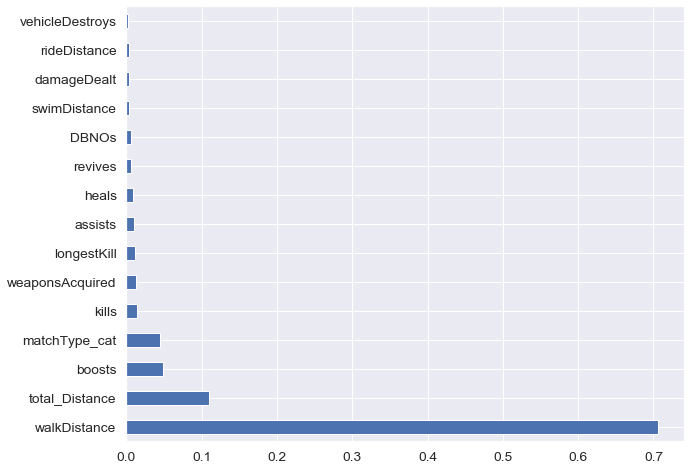

In [397]:
# feature importances
plt.figure(figsize=(10,8))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [398]:
fi=pd.DataFrame({'cols':X.columns, 'imp':model.feature_importances_}).sort_values('imp', ascending=False)
fi

,cols,imp
13,walkDistance,0.705483
15,total_Distance,0.110256
1,boosts,0.049209
19,matchType_cat,0.044755
6,kills,0.014899
14,weaponsAcquired,0.013391
8,longestKill,0.011583
0,assists,0.009781
5,heals,0.008720
9,revives,0.005929
